<a href="https://colab.research.google.com/github/nedokormysh/Stepik_AI_Education_Linear_algorithms/blob/week_2/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Линейная регрессия. Начало.

## План

- Функционалы и метрики
- Линейная регресиия: точное vs приближенное решение
- Интерпретация прогнозов

## Функционалы и метрики

* Функционал (или функция потерь == loss function)  - это функция, позволяющая обучить модель (то есть то, что мы стараемся оптимизировать, подбирая параметры модели - в случае линейной регрессии параметры - это веса)

* Метрика - это оценка качества модели, которую можно использовать к любым моделям (позволяет ответить на вопрос, насколько точно модель может предсказывать целевую переменную)

Пример:

чтобы обучить линейную регрессию мы можем минизировать функционал MSE

Если мы имеем n наблюдений и k признаков

$$\Sigma_{i=0}^{n}(\hat y_{i} - y_{i})^{2} \rightarrow min_{w}$$

где $$\hat y_{i} = \Sigma_{i=0}^{k}w_{k}x_{ik}$$

А как метрику можем использовать RMSE

$$RMSE = \sqrt{\Sigma_{i=0}^{n}(\hat y_{i} - y_{i})^{2}}$$

Фундаментальное различие функционала и метрик в том, что метрика должна отражать нашу бизнес-задачу или научный вопрос, а функционал должен быть подобран так, чтобы он лучше лучше всего помогал достичь цель (позволял достичь наилучшных показателей метрики или метрик)

Аналогия из обучения:

*  Чтобы сдать математику, мы можем учить производные различных функций, то есть тогда наш функционал - это количество производных, которые мы знаем. А метрикой того, что мы сдали математику будет являться оценка, полученная в конце курса.

*  Оценка в курсе - это понятная метрика, которую нам дал мир. А является ли зубрежка производных лучшим функционалом для достижения поставленной цели решать уже вам, как исследователям

И еще, хотя функционал и метрики - это разные по смыслу и использованию инструменты, они могут быть считаться одинаково (то есть к примеру обучать линейную регрессию можно обучать с помощью функционала MSE, и проверять качество тоже можно с помощью MSE)

In [ ]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.linear_model import SGDRegressor

from sklearn.datasets import fetch_california_housing

In [ ]:
RANDOM_STATE = 42

In [ ]:
np.random.seed(42) # фиксировали случайность

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
X, y = fetch_california_housing(return_X_y=True, as_frame=True)

In [ ]:
X.head() # признаки

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [ ]:
y

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: MedHouseVal, Length: 20640, dtype: float64

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [ ]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [ ]:
# Разобьем данные на обучающую и тестовую выборки

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25) #, random_state=RANDOM_STATE)

In [ ]:
sc = StandardScaler() # x -> (x - mean) / std

sc.fit(X_train) # вычисляем mean, std

X_train = pd.DataFrame(sc.transform(X_train), columns = X_train.columns)
X_test = pd.DataFrame(sc.transform(X_test), columns = X_test.columns)

In [ ]:
X_train.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,0.176489,0.666407,-0.060854,-0.281118,-0.496544,-0.048283,-0.860741,0.730999
1,0.771374,1.062889,0.383521,-0.020378,-0.411672,-0.058729,0.709168,-1.196710
2,0.021424,0.587111,0.278523,-0.084625,-0.626915,-0.072838,1.313701,-1.551288
3,1.309004,0.269925,0.233072,-0.243135,-0.234928,-0.069768,-0.696721,0.586171
4,-0.793136,-0.919520,-0.264184,-0.139881,-0.631290,-0.085141,1.369936,-0.872096


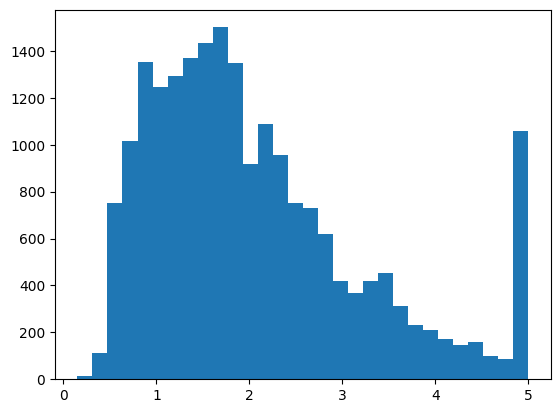

In [ ]:
from matplotlib import pylab as plt

plt.hist(y, bins=30);

Как было рассказано на лекции, линейную регрессию можно обучать с помощью разного функционала (не только MSE, который мы разбирали на прошлом семинаре) и оценивать с помощью разных метрик - закодим это

## Точное и приближенное решение

Линейную регрессию можно обучать по точной формуле, а можно приближенно (с помощью градиентного спуска).

У точного решения есть недостатки:
* оно считается долго, если данных много
* оно может не посчитаться, если в данных есть линейно-зависимые признаки
* оно есть, только если функция потерь - MSE

Поэтому если данных не много, и мы решаем классическую задачу - используем точное решение.

Во всех остальных случаях - градиентный спуск.

Обучим классическую линейную регрессию по точной формуле и оценим ее качество

In [ ]:
from sklearn.linear_model import LinearRegression # MSE

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
lr = LinearRegression() # точное решение

lr.fit(X_train, y_train) # минимизируем функцию потерь

y_pred_lr = lr.predict(X_test)

In [ ]:
y_pred_lr # прогнозы

array([0.72412832, 1.76677807, 2.71151581, ..., 1.72382152, 2.34689276,
       3.52917352])

In [ ]:
y_test # правильные ответы

20046    0.47700
3024     0.45800
15663    5.00001
20484    2.18600
9814     2.78000
          ...   
5363     5.00001
19755    0.63200
4885     1.17700
13043    2.63100
8583     4.81500
Name: MedHouseVal, Length: 5160, dtype: float64

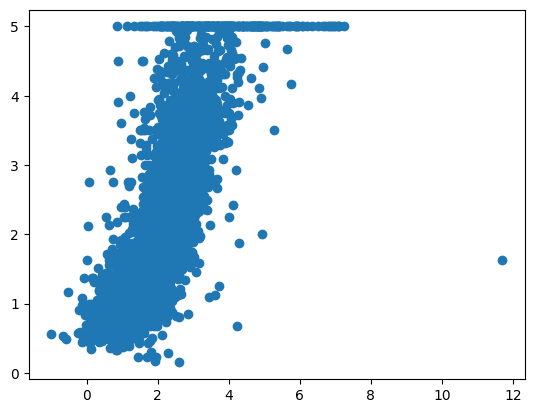

In [ ]:
plt.scatter(y_pred_lr, y_test)

In [ ]:
r2_score(y_test, y_pred_lr) # вычисляем метрику качества

0.5910509795491351

Оценим переобучение

In [ ]:
y_pred_train = lr.predict(X_train)

r2_score(y_train, y_pred_train)

0.609873031052925

Переобучения нет :)

## Обучение с помощью градиентного спуска

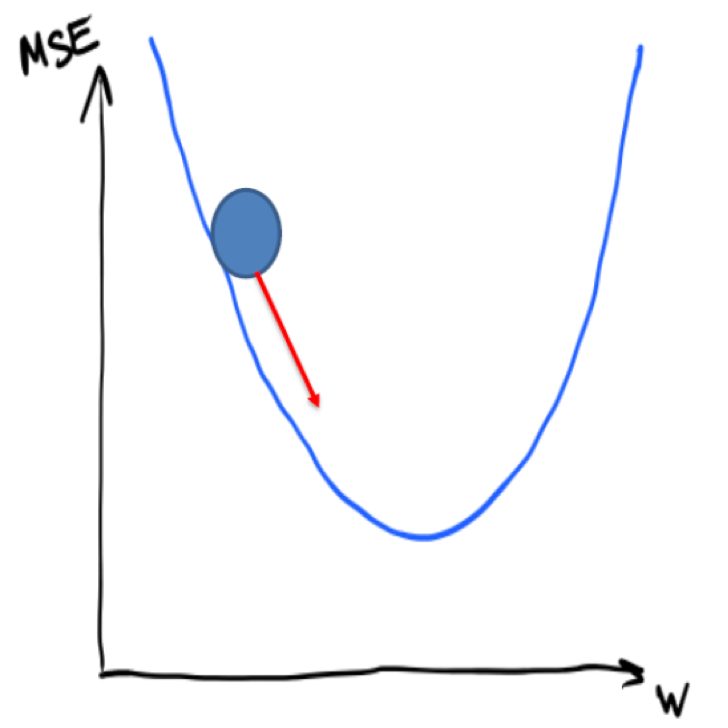

Первый вариант - стандартный - минимизируем MSE.

In [ ]:
from sklearn.linear_model import SGDRegressor

lr_mse = SGDRegressor(loss='squared_error', max_iter=50000, learning_rate='constant', eta0=0.00001) # MSE

lr_mse.fit(X_train, y_train)

y_pred_mse = lr_mse.predict(X_test)

In [ ]:
y_pred_mse = lr_mse.predict(X_test)
r2_score(y_test, y_pred_mse)

0.560227865666836

In [ ]:
pred_test = lr_mse.predict(X_test)

r2_score(y_test, pred_test)

0.560227865666836

Теперь попробуем минимизировать MAE

### Задание


*  обучите модель на тренировочных данных
*  сделайте прогноз на тесте
*  выведите на экран ошибку $R^2$ на тесте
*  подберите `learning_rate` и `eta0` так, чтобы получить наилучшее качество на тестовых данных

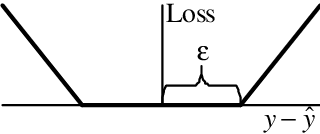

In [ ]:
lr_mae = SGDRegressor(loss='epsilon_insensitive', epsilon=0, max_iter=50000, learning_rate='optimal', random_state=42)

In [ ]:
# ваш код здесь

lr_mae.fit(X_train, y_train)

y_pred_mae = lr_mae.predict(X_test)

r2_score(y_test, y_pred_mae)

0.5280284554821728

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error

print(f'''MSE loss:
mae={mean_absolute_error(y_test, y_pred_mse)}
mse={mean_squared_error(y_test, y_pred_mse)}
mape={mean_absolute_percentage_error(y_test, y_pred_mse)}
R2={r2_score(y_test, y_pred_mse)}
''')

print(f'''MAE loss:
mae={mean_absolute_error(y_test, y_pred_mae)}
mse={mean_squared_error(y_test, y_pred_mae)}
mape={mean_absolute_percentage_error(y_test, y_pred_mae)}
R2={r2_score(y_test, y_pred_mae)}
''')

MSE loss:
mae=0.5607145334484367
mse=0.5819144501859258
mape=0.34142464805594114
R2=0.560227865666836

MAE loss:
mae=0.5534435220468144
mse=0.6245212927097961
mape=0.3164697049290548
R2=0.5280284554821728



Как мы говорили раньше, метрика должна отражать реальную цель из мира, поэтому нередко возникает потребность в написании своих собственных метрик, которые лучше описывают вашу конретную реальность. В задачах, связанных с медициной (как у нас сейчас), довольно высокая цена ошибки (у человека есть диабет, а мы его не нашли). Поэтому для того, чтобы ответить на вопрос, можно ли модель использовать в жизни, имеет смысл использовать метрику максимальной ошибки модели

$max error = max(|\hat y_{i} - y_{i}|)$

In [27]:
def max_error(y_true, y_pred):
    max_erorr = np.abs(y_true - y_pred).max()
    return max_erorr

def quantile_error(y_true, y_pred, q=0.95):
    q_error = np.quantile(np.abs(y_true -  y_pred), q)
    return q_error

# Оценим максимальную ошибку в обоих случаях

print(f'MSE Loss: {max_error(y_test, y_pred_mse)}')
print(f'MAE Loss: {max_error(y_test, y_pred_mae)}')

MSE Loss: 4.317444524722972
MAE Loss: 6.23293263308919


В sklearn есть большое количество уже реализованных метрик - можете посмотреть их список и варианты применения здесь

https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics

## Интерпретация прогнозов модели

In [28]:
lr_mse.coef_

array([ 0.79128564,  0.19340895, -0.03201605,  0.04555293,  0.02039492,
       -0.04446739, -0.33223991, -0.29147816])

In [29]:
results = pd.DataFrame({'features' : X_train.columns, 'weights' : lr_mse.coef_})

results = results.sort_values(by='weights')

In [30]:
results

,features,weights
6,Latitude,-0.332240
7,Longitude,-0.291478
5,AveOccup,-0.044467
2,AveRooms,-0.032016
4,Population,0.020395
3,AveBedrms,0.045553
1,HouseAge,0.193409
0,MedInc,0.791286
